## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2025-10-24 06:17:59.641293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761286679.804657      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761286679.849886      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)


Found 70295 files belonging to 38 classes.


I0000 00:00:1761286724.308241      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761286724.308905      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [3]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [4]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break;

tf.Tensor(
[[[[ 83.5  124.5   82.5 ]
   [ 90.   131.    89.  ]
   [ 94.5  135.5   93.5 ]
   ...
   [137.   174.    97.  ]
   [129.   166.    89.  ]
   [121.   158.    81.  ]]

  [[ 78.75 119.75  77.75]
   [ 85.5  126.5   84.5 ]
   [ 91.75 132.75  90.75]
   ...
   [135.75 171.75  97.75]
   [126.25 162.25  88.25]
   [123.5  159.5   85.5 ]]

  [[ 79.25 120.25  78.25]
   [ 84.   125.    83.  ]
   [ 90.5  131.5   89.5 ]
   ...
   [131.   167.    95.  ]
   [126.5  162.5   90.5 ]
   [127.75 163.75  91.75]]

  ...

  [[138.   164.   105.25]
   [115.5  142.75  83.75]
   [ 99.75 127.75  68.5 ]
   ...
   [173.75 205.25 144.25]
   [169.75 202.25 135.25]
   [162.25 195.25 125.25]]

  [[135.   163.5  107.25]
   [144.25 173.25 116.75]
   [137.75 166.75 110.25]
   ...
   [174.75 204.25 144.25]
   [169.   199.5  133.5 ]
   [163.5  194.5  125.5 ]]

  [[ 89.   121.    64.  ]
   [105.5  136.5   79.5 ]
   [139.25 170.25 113.25]
   ...
   [173.   202.5  142.5 ]
   [166.   196.5  130.5 ]
   [162.5  193.5  12

### Validation Image Preprocessing

In [5]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)


Found 17572 files belonging to 38 classes.


## Building Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512 ,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
# Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [20]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1761286734.763234     105 service.cc:148] XLA service 0x781d7c001e60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761286734.763967     105 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761286734.763985     105 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761286735.319948     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/2197 ━━━━━━━━━━━━━━━━━━━━ 3:06 85ms/step - accuracy: 0.0469 - loss: 3.9238  

I0000 00:00:1761286743.468048     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 168s 70ms/step - accuracy: 0.4057 - loss: 2.0927 - val_accuracy: 0.8378 - val_loss: 0.5076
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.8392 - loss: 0.5074 - val_accuracy: 0.8995 - val_loss: 0.3111
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9052 - loss: 0.2920 - val_accuracy: 0.9313 - val_loss: 0.2054
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9350 - loss: 0.1967 - val_accuracy: 0.9167 - val_loss: 0.2672
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9534 - loss: 0.1409 - val_accuracy: 0.9605 - val_loss: 0.1217
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.9647 - loss: 0.1112 - val_accuracy: 0.9621 - val_loss: 0.1148
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.9704 - loss: 0.0915 - val_accuracy: 0.9680 - val_loss: 0.1036
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9770 - lo

## Model Evaluation

In [21]:
# Model Evaluation on Training Set
train_loss,train_accuracy=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.9879 - loss: 0.0366


In [22]:
print(train_loss,train_accuracy)

0.03468230739235878 0.9885340332984924


In [23]:
# Model Evaluation on Validation Set
val_loss,val_accuracy=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9603 - loss: 0.1287


In [24]:
print(val_loss,val_accuracy)

0.1346532553434372 0.9585135579109192


## Saving the Model

In [25]:
!mkdir -p /kaggle/working/models


In [26]:
model.save("/kaggle/working/models/pdd_trained_model.h5")

In [27]:
model.save("/kaggle/working/models/pdd_trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.6068852543830872,
  0.863304615020752,
  0.9155416488647461,
  0.9417881965637207,
  0.9569243788719177,
  0.966825544834137,
  0.9715911746025085,
  0.9766128659248352,
  0.9809944033622742,
  0.9813926815986633],
 'loss': [1.3257406949996948,
  0.4307515621185303,
  0.26162412762641907,
  0.1775834709405899,
  0.13010063767433167,
  0.10239381343126297,
  0.08677257597446442,
  0.07240980863571167,
  0.058411434292793274,
  0.05583881586790085],
 'val_accuracy': [0.8378101587295532,
  0.8994991779327393,
  0.9312542676925659,
  0.9166856408119202,
  0.9605053663253784,
  0.9620987772941589,
  0.9679604172706604,
  0.9643182158470154,
  0.9591395258903503,
  0.9585135579109192],
 'val_loss': [0.5075795650482178,
  0.3110542297363281,
  0.20541664958000183,
  0.26716160774230957,
  0.12165544927120209,
  0.11479252576828003,
  0.10356949269771576,
  0.1134033054113388,
  0.13917022943496704,
  0.1346532553434372]}

In [29]:
!mkdir -p /kaggle/working/history


In [30]:
# Recording Model History in Json
import json

with open('/kaggle/working/history/pdd_model_history.json', 'w') as f:
    json.dump(training_history.history, f)


## Accuracy Visualization

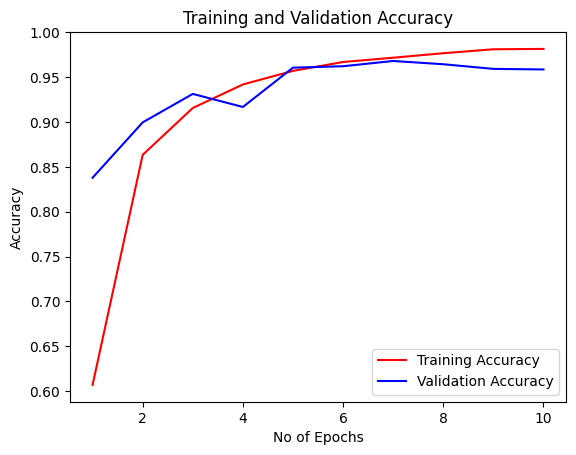

In [31]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Some Other Model Evaluation Metrices

In [32]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step


(array([[1.0000000e+00, 1.2726991e-12, 3.1984533e-13, ..., 1.0824865e-17,
         1.1131946e-17, 1.2143143e-15],
        [9.9999905e-01, 1.0043516e-11, 9.2286040e-12, ..., 4.3011740e-15,
         1.3891512e-14, 3.2652939e-13],
        [1.0000000e+00, 1.6631374e-10, 4.5789129e-11, ..., 2.0502538e-16,
         2.4239428e-14, 1.5822028e-12],
        ...,
        [2.4001271e-13, 7.5164393e-17, 9.3014629e-10, ..., 3.7765562e-13,
         2.3203292e-15, 9.9999988e-01],
        [2.6047991e-15, 9.2257108e-19, 1.0587293e-12, ..., 4.0454878e-15,
         6.0679879e-17, 1.0000000e+00],
        [1.0762522e-11, 1.4406484e-12, 5.5832176e-11, ..., 2.5313983e-12,
         1.6696209e-11, 9.9999464e-01]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [38]:
true_categories = tf.concat([y for x,y in test_set], axis=0)

In [39]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
y_true = tf.argmax(true_categories, axis=1)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.94      0.94       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.95      0.94      0.95       502
                               Blueberry___healthy       0.88      0.99      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.97      1.00      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.87      0.91       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

In [42]:
cm = confusion_matrix(y_true,predicted_categories)
cm


array([[472,   0,   0, ...,   0,   0,   0],
       [  7, 480,   0, ...,   0,   0,   0],
       [  0,   0, 425, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ..., 483,   1,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 474]])

In [43]:
cm.shape

(38, 38)

### Confusion Matrix Visualization

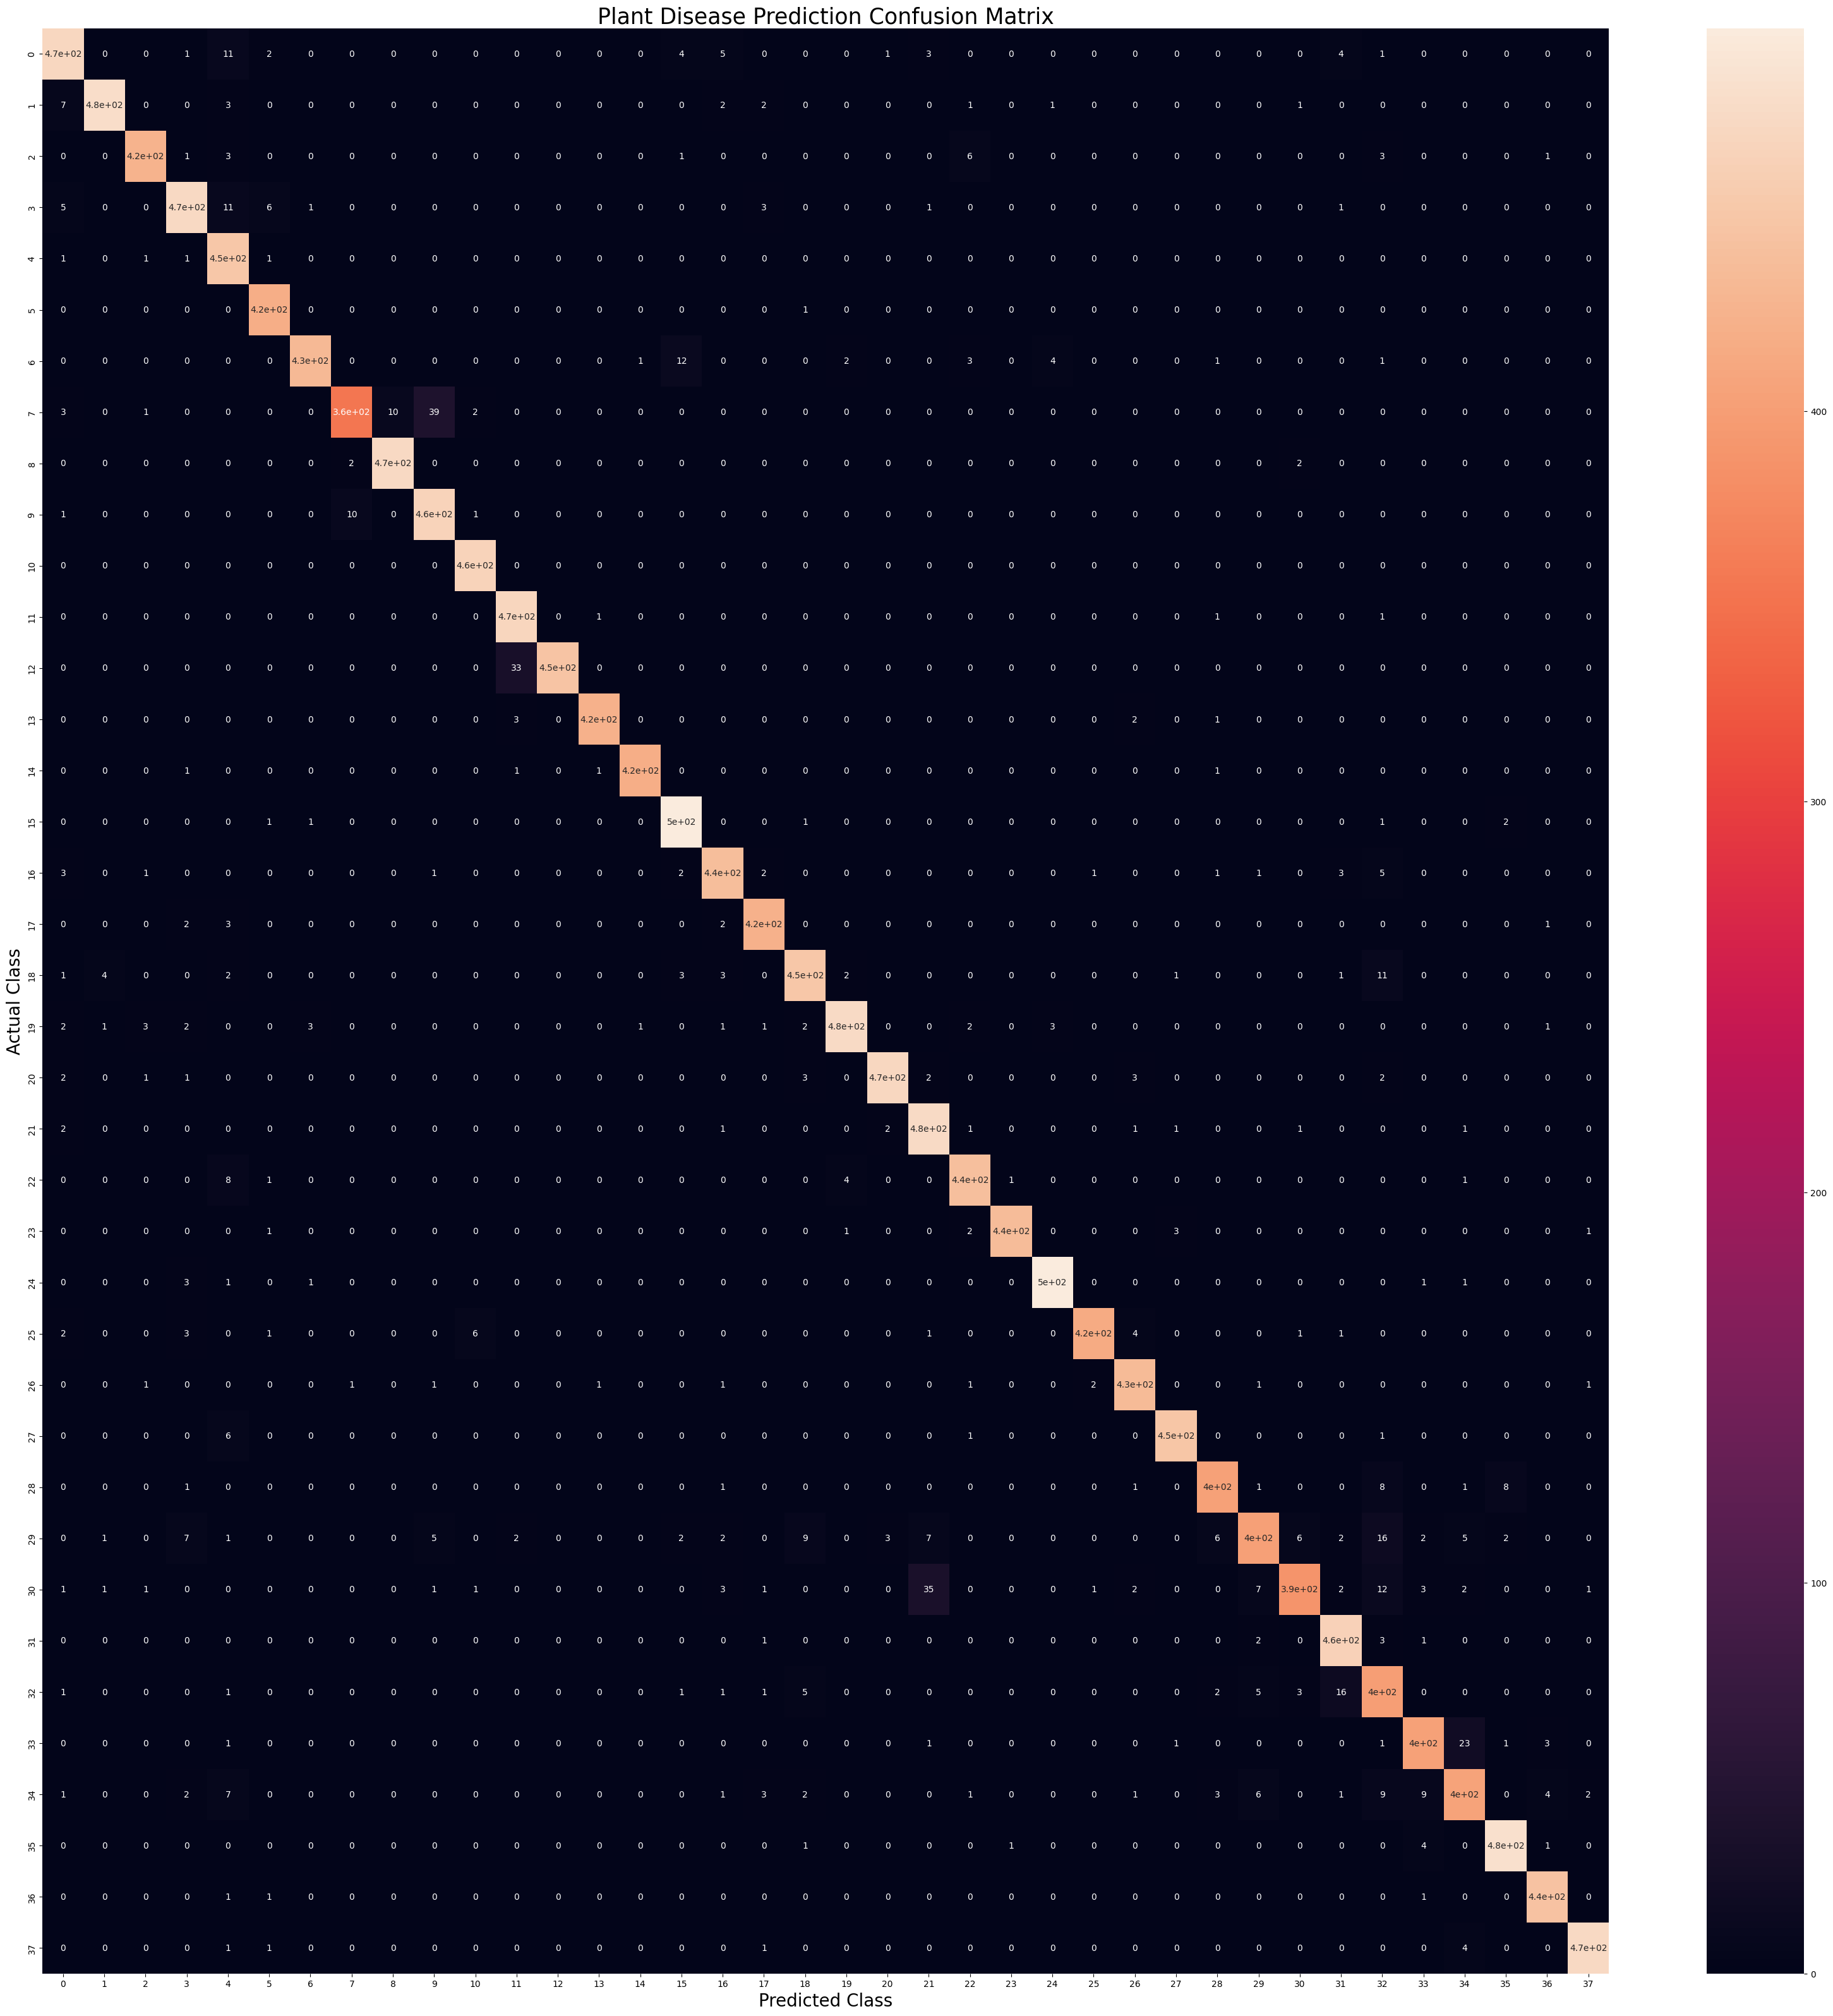

In [49]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.show()